In [2]:
pip install yfinance pycaret matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.0 MB/s eta 0:0

In [16]:
import yfinance as yf
import pandas as pd

# Download historical stock data
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-09-05')

# Select the 'Close' price and reset the index
df = stock_data[['Close']].reset_index()

# Rename columns for clarity
df.columns = ['Date', 'Price']

# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Resample the data to have a regular daily frequency, and forward-fill missing values
df = df.resample('D').ffill()

# Check if the resampling worked
print(df.head())

[*********************100%***********************]  1 of 1 completed

                 Price
Date                  
2023-01-03  125.070000
2023-01-04  126.360001
2023-01-05  125.019997
2023-01-06  129.619995
2023-01-07  129.619995


In [17]:
from pycaret.time_series import *

# Initialize the setup for time series forecasting
exp = setup(df, 
            target='Price',
            fold_strategy='expanding',  # or 'sliding' or 'rolling'
            session_id=123)

# Compare various time series models
best_model = compare_models()


,Description,Value
0,session_id,123
1,Target,Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(611, 1)"
5,Transformed data shape,"(611, 1)"
6,Transformed train set shape,"(610, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
stlf,STLF,0.0986,0.0805,0.9637,0.9637,0.0042,0.0043,0.1067
arima,ARIMA,0.1612,0.1316,1.5756,1.5756,0.0071,0.0071,0.6633
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.1758,0.1435,1.7176,1.7176,0.0077,0.0076,0.3433
auto_arima,Auto ARIMA,0.2014,0.1644,1.9678,1.9678,0.0088,0.0087,19.0267
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.2132,0.1741,2.0838,2.0838,0.0093,0.0092,5.0700
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.2163,0.1766,2.1135,2.1135,0.0095,0.0094,0.1700
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2173,0.1774,2.1231,2.1231,0.0095,0.0094,0.1700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2173,0.1774,2.1231,2.1231,0.0095,0.0094,0.1767
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.2202,0.1798,2.1517,2.1517,0.0096,0.0095,0.1600
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2249,0.1836,2.1975,2.1975,0.0098,0.0097,1.1467


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [18]:
# Train the best model
final_model = finalize_model(best_model)

# Predict future values
future_predictions = predict_model(final_model, fh=30)  # Forecast 30 days ahead

# View the predictions
print(future_predictions)


              y_pred
2024-09-05  223.6907
2024-09-06  229.3786
2024-09-07  230.1333
2024-09-08  231.4877
2024-09-09  231.1082
2024-09-10  231.7428
2024-09-11  235.8806
2024-09-12  236.8250
2024-09-13  235.8081
2024-09-14  234.5833
2024-09-15  233.8466
2024-09-16  233.4490
2024-09-17  232.9831
2024-09-18  233.3398
2024-09-19  233.7736
2024-09-20  230.1973
2024-09-21  231.4837
2024-09-22  232.1818
2024-09-23  231.7372
2024-09-24  231.5286
2024-09-25  231.2275
2024-09-26  231.4223
2024-09-27  235.2295
2024-09-28  233.6251
2024-09-29  234.1355
2024-09-30  234.9000
2024-10-01  234.6918
2024-10-02  226.5174
2024-10-03  224.6503
2024-10-04  228.6259


In [21]:
print(future_predictions.columns)




Index(['y_pred'], dtype='object')


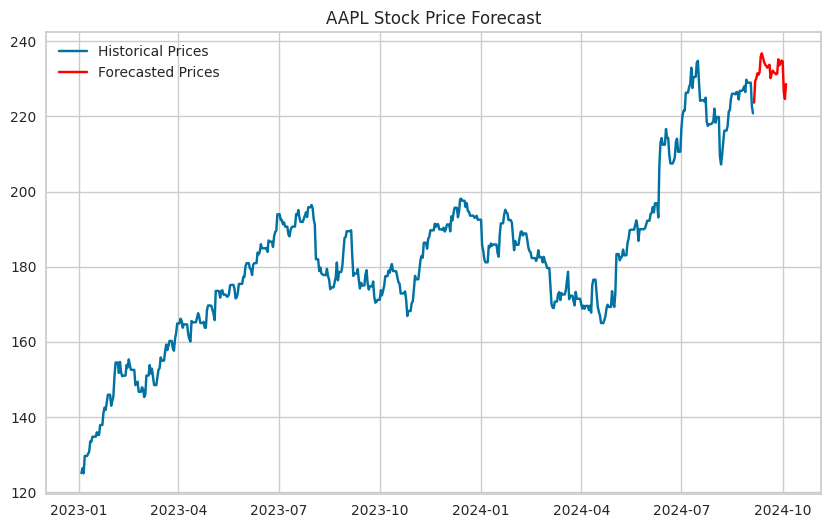

In [24]:
import matplotlib.pyplot as plt

# Plot the actual and forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Historical Prices')
plt.plot(future_predictions.index, future_predictions['y_pred'], label='Forecasted Prices', color='red')
plt.legend()
plt.title('AAPL Stock Price Forecast')
plt.show()
